# Introduction

In accordance with the capstone requirements of the Google Data Analytics Certificate, I am acting as a hypothetical junior data analyst for Cyclistic, a bike-share company in Chicago.

Cyclistic is a bike-share company that provides a fleet of 5,824 geo-tracked bicycles across 692 stations in Chicago. Cyclistic's marketing strategy has been focused on raising general awareness and attracting a wide range of consumers through flexible pricing plans, including single-ride passes, full-day passes, and annual memberships. Casual riders are those who opt for single-ride or full-day passes, while annual memberships are purchased by Cyclistic members.

#### Business Goals

Cyclistic's finance analysts have found that annual members yield more profit than casual riders. With this, the company aims to **increase the number of annual members by converting casual riders** who are already familiar with Cyclistic's services. To design marketing strategies targeting casual riders, the marketing team needs to answer the following questions:

1.  How do annual members and casual riders use Cyclistic bikes differently?
2.  Why would casual riders buy Cyclistic annual memberships?
3.  How can Cyclistic use digital media to influence casual riders to become members?

The purpose of this report is to answer the following question: **How do annual members and casual riders use Cyclistic bikes differently?** by analyzing the consumption patterns of annual members vs casual riders.

#### About the Dataset

This report draws its findings from the Motivate International Inc cycling dataset, which contains 11,387,594 unique observations and 13 variables for each ride recorded in the dataset. The dataset records the bike rides of hypothetical Cyclistic customers from January 2022 to December 2023. Python will be used to process the data for analysis, due to the large amount of data to process.

This dataset is considered public data, made available by Motivate International Inc. under [this license](https://divvybikes.com/data-license-agreement). For privacy purposes riders personally identifiable information has been excluded from the data.

# Data Cleaning and Pre-processing

Before conducting the analysis, I performed several data cleaning and preprocessing steps. The following outlines a summary:

1.  Joined the datasets split by month into one dataframe
2.  Created a column ride_min by subtracting ended_at and started_at columns
3.  Set ride_length as numerical data
4.  Dropped records with ride_length of less than 0
5.  Created new columns start_month, start_hour, and weekday
6.  Dropped records with null values (N/A)
7.  Dropped duplicate records

Through this, columns and records unnecessary to the analysis moving forward are removed from the dataset. Furthermore, to ensure the quality of the data, null values and other noise were removed.

The following code was used to perform the data cleaning and pre-processing.

In [35]:
# Import relevant libraries
import pandas as pd
import numpy as np
import warnings
import glob

# suppress scientific notation by setting float_format
pd.options.display.float_format = '{:,.0f}'.format

# Remove warnings
warnings.filterwarnings("ignore")

In [36]:
# Extract data from csv files into one dataframe
csv_files = glob.glob('Datasets/*.csv')

raw_df = pd.DataFrame()

for file in csv_files:
    df = pd.read_csv(file)
    raw_df = pd.concat([raw_df, df])

raw_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42,-88,42,-88,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42,-88,42,-88,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,42,-88,42,-88,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,42,-88,42,-88,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,42,-88,42,-88,member


In [37]:
# Create a copy of the raw data
main_df = raw_df

# Describe the dataset
print(len(main_df))
print(main_df.columns)

11387594
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


There are 11,387,594 records with 13 columns in this dataset

In [38]:
# Convert 'date_strings' column to datetime format to get the differece in minutes
main_df['ended_at'] = pd.to_datetime(main_df['ended_at'])
main_df['started_at'] = pd.to_datetime(main_df['started_at'])

# ride_min column to denote travel time in minutes per ride
main_df['ride_min'] = (main_df['ended_at'] - main_df['started_at']).dt.total_seconds() / 60

# Remove records with negative ride time lengths
main_df = main_df[main_df['ride_min'] >= 0]
print("Number of rows removed: %s" % (str(len(main_df) - len(main_df))))
print("Number of rows remaining: %s" % str(len(main_df)))

Number of rows removed: 0
Number of rows remaining: 11387222


In [39]:
# Create start_month and start_wkday
main_df['start_month'] = main_df['started_at'].dt.month
main_df['start_wkday'] = main_df['started_at'].dt.weekday
main_df['start_hour'] = main_df['started_at'].dt.hour
main_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_min,start_month,start_wkday,start_hour
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42,-88,42,-88,casual,3,1,3,11
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42,-88,42,-88,casual,4,1,0,8
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,42,-88,42,-88,member,4,1,1,4
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,42,-88,42,-88,casual,15,1,1,0
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,42,-88,42,-88,member,6,1,3,1


In [40]:
# Calculate distance using latitude and longitude values
from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(row):
    lng1, lat1 = row['start_lng'], row['start_lat']
    lng2, lat2 = row['end_lng'], row['end_lat']

    lng1, lat1, lng2, lat2 = map(radians, [lng1, lat1, lng2, lat2])
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c
    return km * 1000

main_df['distance'] = main_df.apply(lambda row: haversine(row), axis=1)
main_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_min,start_month,start_wkday,start_hour,distance
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42,-88,42,-88,casual,3,1,3,11,699
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42,-88,42,-88,casual,4,1,0,8,694
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,42,-88,42,-88,member,4,1,1,4,"1,000"
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,42,-88,42,-88,casual,15,1,1,0,"2,461"
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,42,-88,42,-88,member,6,1,3,1,814


In [41]:
clean_df = main_df.dropna()
clean_df = clean_df.drop_duplicates()

print("Dropping null and duplicate records")
print("Number of rows removed: %s" % (len(main_df) - len(clean_df)))
print("Number of rows remaining: %s" % len(clean_df))

Dropping null and duplicate records
Number of rows removed: 2686290
Number of rows remaining: 8700932


## Data Analysis and Visualization

With the data cleaned and pre-processed, the dataframe is now primed for data analysis and visualization. To better understand how annual members and casual riders use Cyclistic bikes differently, the following attributes may be analyzed:

1.  Membership Types (Member vs Casual)
2.  Rideable Types by Membership Type
3.  Ride Duration by Membership Type
4.  Rides by Month by Membership Type
5.  Rides by Weekday by Membership Type
6.  Rides by Hour by Membership Type
7.  Top Starting and Ending Stations

The following code was used to perform the data analysis.

In [42]:
# Import data visualization libraries
import matplotlib.pyplot as plt
import plotly.express as px

colors = ['tab:orange', 'tab:blue']

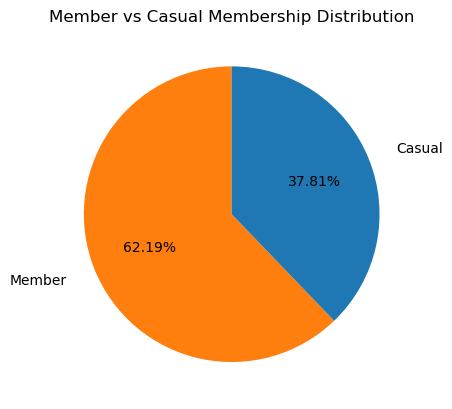

The number of annual members total to 5,411,061 and casual riders to 3,289,871.
This results to a distribution of 62.19% annual members and 37.81% casual riders for Jan 2021 - Dec 2023.
The rides are made up of around 2/3 annual members and 1/3 casual riders.


In [43]:
# Distribution of membership types
a = len(clean_df[clean_df['member_casual'] == 'member'])
b = len(clean_df[clean_df['member_casual'] == 'casual'])

tmp_df = pd.DataFrame({
    'values': [a / (a+b), b / (a+b)],
    'index': ['Member','Casual']
})

plt.title('Member vs Casual Membership Distribution')
plt.pie(tmp_df['values'], labels=tmp_df['index'], colors=colors, autopct='%1.2f%%', pctdistance=0.6, labeldistance=1.2, startangle=90, radius=1)
plt.gca().set_ylabel('')

plt.show()

print("The number of annual members total to %s and casual riders to %s." % (f'{a:,}' , f'{b:,}' ))
print("This results to a distribution of %s annual members and %s casual riders for Jan 2021 - Dec 2023." % 
      (f'{a / (a+b):.2%}',
       f'{b / (a+b):.2%}')
     )
print("The rides are made up of around 2/3 annual members and 1/3 casual riders.")

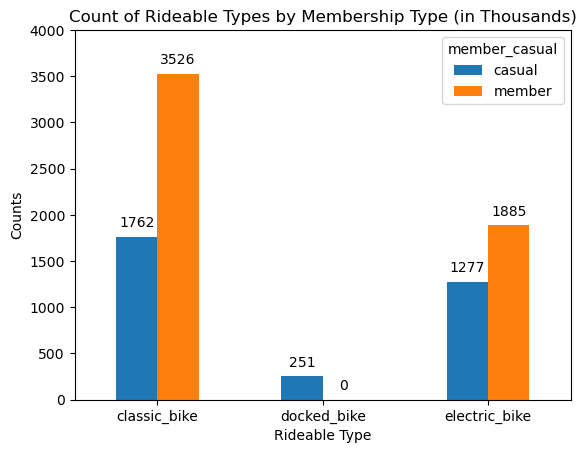

In [44]:
# Count of Rideable Types by Membership Type
tmp_df = clean_df[['rideable_type','member_casual']]

counts_df = tmp_df.groupby(['rideable_type','member_casual']).size().unstack(fill_value=0)
counts_df = counts_df / 1000

ax = counts_df.plot(kind='bar', stacked=False)
plt.xlabel('Rideable Type')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.title('Count of Rideable Types by Membership Type (in Thousands)')

ax.ticklabel_format(style='plain', axis='y')

ax.set_ylim(0, 4000)

for p in ax.patches:
    ax.annotate(str(f'{p.get_height():.0f}'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Majority of the rides with classic and electric bikes were ridden by annual members. On the other hand, only casual riders rode the docked bikes. 
For both types of riders, classic bikes are the most popular choice, followed by electric bikes and docked bikes.

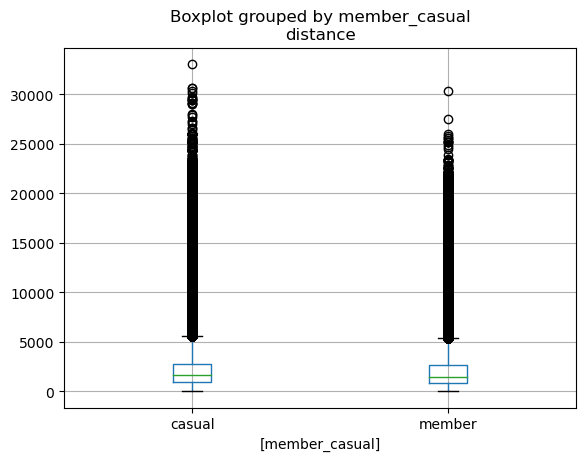

In [58]:
# Ride Duration By Membership
tmp_df = clean_df[['member_casual','distance']]
tmp_df = tmp_df[tmp_df['distance'] < 200000]
tmp_df.boxplot(by=['member_casual']);

In [60]:
# Count of Rideable Types by Membership Type
tmp_df = clean_df[['rideable_type','member_casual','distance']]

counts_df = tmp_df.groupby(['rideable_type', 'member_casual'])['distance'].describe()
counts_df

count  mean    std  min  25%   50%   75%  \
rideable_type member_casual                                                
classic_bike  casual        1,761,769 2,077 12,934    0  886 1,581 2,681   
              member        3,526,336 1,928 12,903    0  807 1,374 2,457   
docked_bike   casual          250,982 2,167  2,286    0  607 1,598 2,930   
electric_bike casual        1,277,120 2,216  8,948    0  992 1,704 2,885   
              member        1,884,725 2,282  7,401    0  991 1,708 3,018   

                                  max  
rideable_type member_casual            
classic_bike  casual        9,806,911  
              member        9,807,216  
docked_bike   casual           30,608  
electric_bike casual        9,807,908  
              member        9,809,266

In [49]:
# Ride Duration By Membership
counts_df = tmp_df[tmp_df['member_casual'] == 'casual'].describe()
counts_df = counts_df.rename(columns={'ride_min': 'casual'})
counts_df['member'] = tmp_df[tmp_df['member_casual'] == 'member'].describe()

counts_df

,casual,member
count,"3,289,871","5,411,061"
mean,24,12
std,63,21
min,0,0
25%,8,5
50%,13,9
75%,25,15
max,"34,354","1,498"


Casual riders on average ride for 24 minutes, while annual members 12 minutes. The standard deviation for casual riders indicate a wider range of ride times, with some ride times reaching extreme values that may hint at bikes forgotten to be returned.

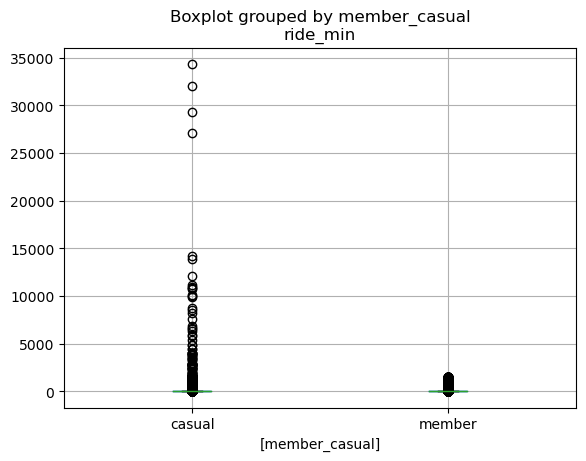

In [48]:
# Ride Duration By Membership
tmp_df = clean_df[['member_casual','ride_min']]
tmp_df.boxplot(by=['member_casual']);

The distribution of ride times in minutes for casual riders vary more than annual members, perhaps because some casual members bike at a slower pace. Some extreme values from casual riders may indicate that some bikes were rented over the period of multiple days, rather than for a single trip within a day, or that some bikes were returned very late (with some lasting years)

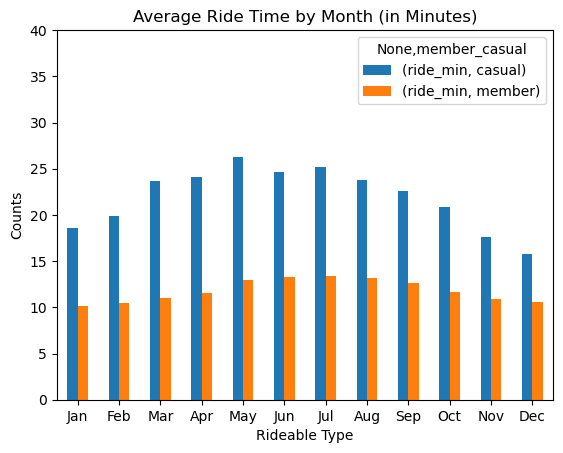

In [50]:
# Average ride time per month
tmp_df = clean_df[['start_month','ride_min','member_casual']]
counts_df = tmp_df.groupby(['start_month','member_casual']).mean().unstack(fill_value=0)
x_axis_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax = counts_df.plot(kind='bar', stacked=False)
plt.xlabel('Rideable Type')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.title('Average Ride Time by Month (in Minutes)')

ax.set_xticklabels(x_axis_label)
ax.ticklabel_format(style='plain', axis='y')

ax.set_ylim(0, 40)

plt.show()

The average ride time by month for annual members shows a slight increase during May to October and decline during the low season. This may be due to weather patterns, where warmer weather encourages riders to bike for longer. The pattern is less apparent for casual riders, which may indicate their sporadic nature of their riding.

Casual riders bike for longer than members, possibly due to a slower pace, or simply because of longer bike return times as seen by the variance of ride times in the boxplot above.

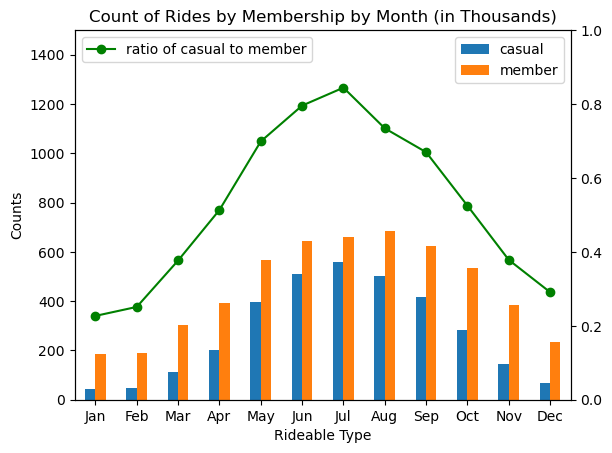

In [51]:
# Count of Monthly Rides by Membership Type
tmp_df = clean_df[['start_month','member_casual']]
x_axis_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

counts_df = tmp_df.groupby(['start_month','member_casual']).size().unstack(fill_value=0)
counts_df = counts_df / 1000

ax = counts_df.plot(kind='bar', stacked=False)
plt.xlabel('Rideable Type')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.title('Count of Rides by Membership by Month (in Thousands)')

ax.set_xticklabels(x_axis_label)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylim(0, 1500)

ax2 = ax.twinx()
counts_df2 = tmp_df.groupby('start_month').size()
counts_df2 = counts_df2 / 1000

counts_df2 = counts_df['casual'] / counts_df['member']
ax2.plot(counts_df2.index - 1, counts_df2.values, color='green', marker='o')

ax2.set_ylim(0,1)

ax.legend()
ax2.legend(["ratio of casual to member"], loc='upper left')

plt.show()

The count of rides for both casual riders and annual members peak around May to October, which may be because of the summer season in the US, where riding outside becomes a more attractive activity. This is in contrast to the count of rides from November to April, where the weather is colder.

It is interesting to note that the ratio of casual riders to annual members rise and fall alongside the peak season and low season, indicating a faster rate of change for the casual rider customer segment than the annual members segment. This makes sense as memberships generally increase customer retention and loyalty.

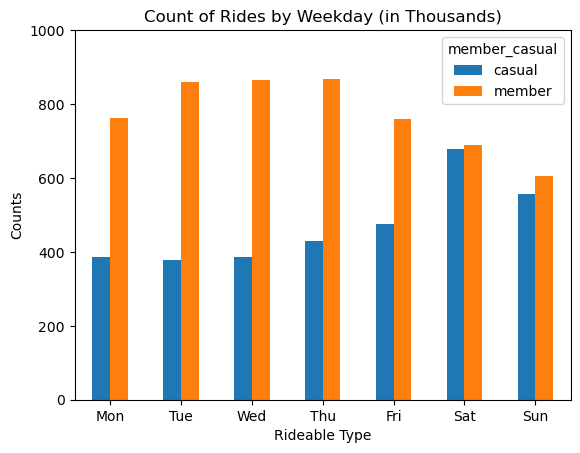

In [52]:
# Weekdays + Membership Type
tmp_df = clean_df[['start_wkday','member_casual']]

x_axis_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
counts_df = tmp_df.groupby(['start_wkday','member_casual']).size().unstack(fill_value=0)
counts_df = counts_df / 1000

ax = counts_df.plot(kind='bar', stacked=False)
plt.xlabel('Rideable Type')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.title('Count of Rides by Weekday (in Thousands)')

ax.set_xticklabels(x_axis_label)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylim(0, 1000)

plt.show();

Looking at the number of rides by weekday, annual members prefer to ride during weekdays. In contrast, casual riders generally ride on weekends more, particularly Saturday. The annual members may have adapted their usage to maximize their subscription to the company.

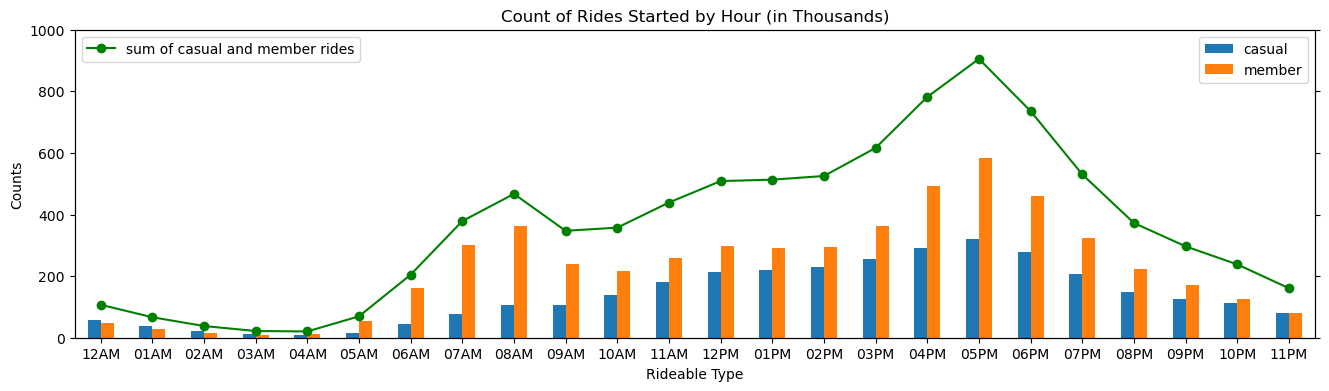

In [53]:
# Hours + Membership Type
tmp_df = clean_df[['start_hour','member_casual']]

x_axis_label = ['12AM', '01AM', '02AM', '03AM', '04AM', '05AM',
                '06AM', '07AM', '08AM', '09AM', '10AM', '11AM',
                '12PM', '01PM', '02PM', '03PM', '04PM', '05PM',
                '06PM', '07PM', '08PM', '09PM', '10PM', '11PM',
               ]

counts_df = tmp_df.groupby(['start_hour','member_casual']).size().unstack(fill_value=0)
counts_df = counts_df / 1000

ax = counts_df.plot(kind='bar', stacked=False)

fig = ax.get_figure()
fig.set_size_inches(16, 4)

plt.xlabel('Rideable Type')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.title('Count of Rides Started by Hour (in Thousands)')

ax.set_xticklabels(x_axis_label)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylim(0, 1000)

ax2 = ax.twinx()
counts_df2 = tmp_df.groupby('start_hour').size()
counts_df2 = counts_df['member'] + counts_df['casual']

ax2.plot(counts_df2.index, counts_df2.values, color='green', marker='o')
ax2.set_ylim(0,1000)
ax2.set_yticklabels([])

ax.legend()
ax2.legend(["sum of casual and member rides"], loc='upper left')

plt.show();

The rides typically increase in number as early as 05AM and peak at 08AM in the morning, before picking up again at 02PM to 05PM. Annual members make up the bulk of this trend, particularly for the morning surge in rides started. These patterns may correlate to how Cyclistic customers ride bikes for work for the 09AM-05PM schedule. Casual riders also display a similar trend but at a more distributed pace, with rides started slowly building up and peaking at 05PM.

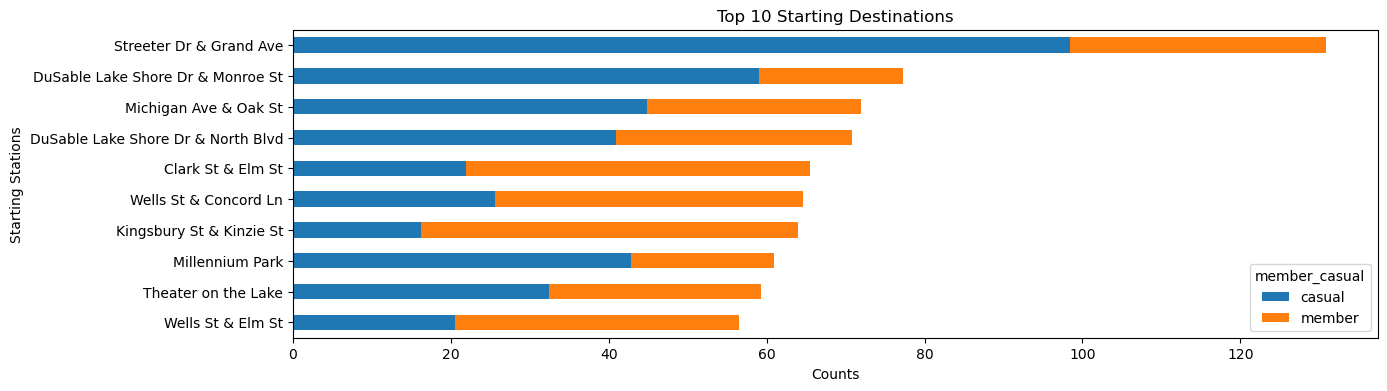

In [54]:
tmp_df = clean_df[['start_station_name','member_casual']]

counts_df = tmp_df.groupby(['start_station_name','member_casual']).size().unstack(fill_value=0)

counts_df['total'] = clean_df['start_station_name'].value_counts()
counts_df = counts_df.sort_values(by='total', ascending=False).head(10)
counts_df = counts_df.sort_values(by='total', ascending=True)
counts_df = counts_df.drop(columns=['total'])
counts_df = counts_df / 1000

ax = counts_df.plot(kind='barh', stacked=True)

fig = ax.get_figure()
fig.set_size_inches(14, 4)

plt.xlabel('Counts')
plt.ylabel('Starting Stations')
plt.xticks(rotation=0)
plt.title('Top 10 Starting Destinations')

plt.show()

The top starting stations are as follows, with Streeter Dr & Grand Ave being the top result

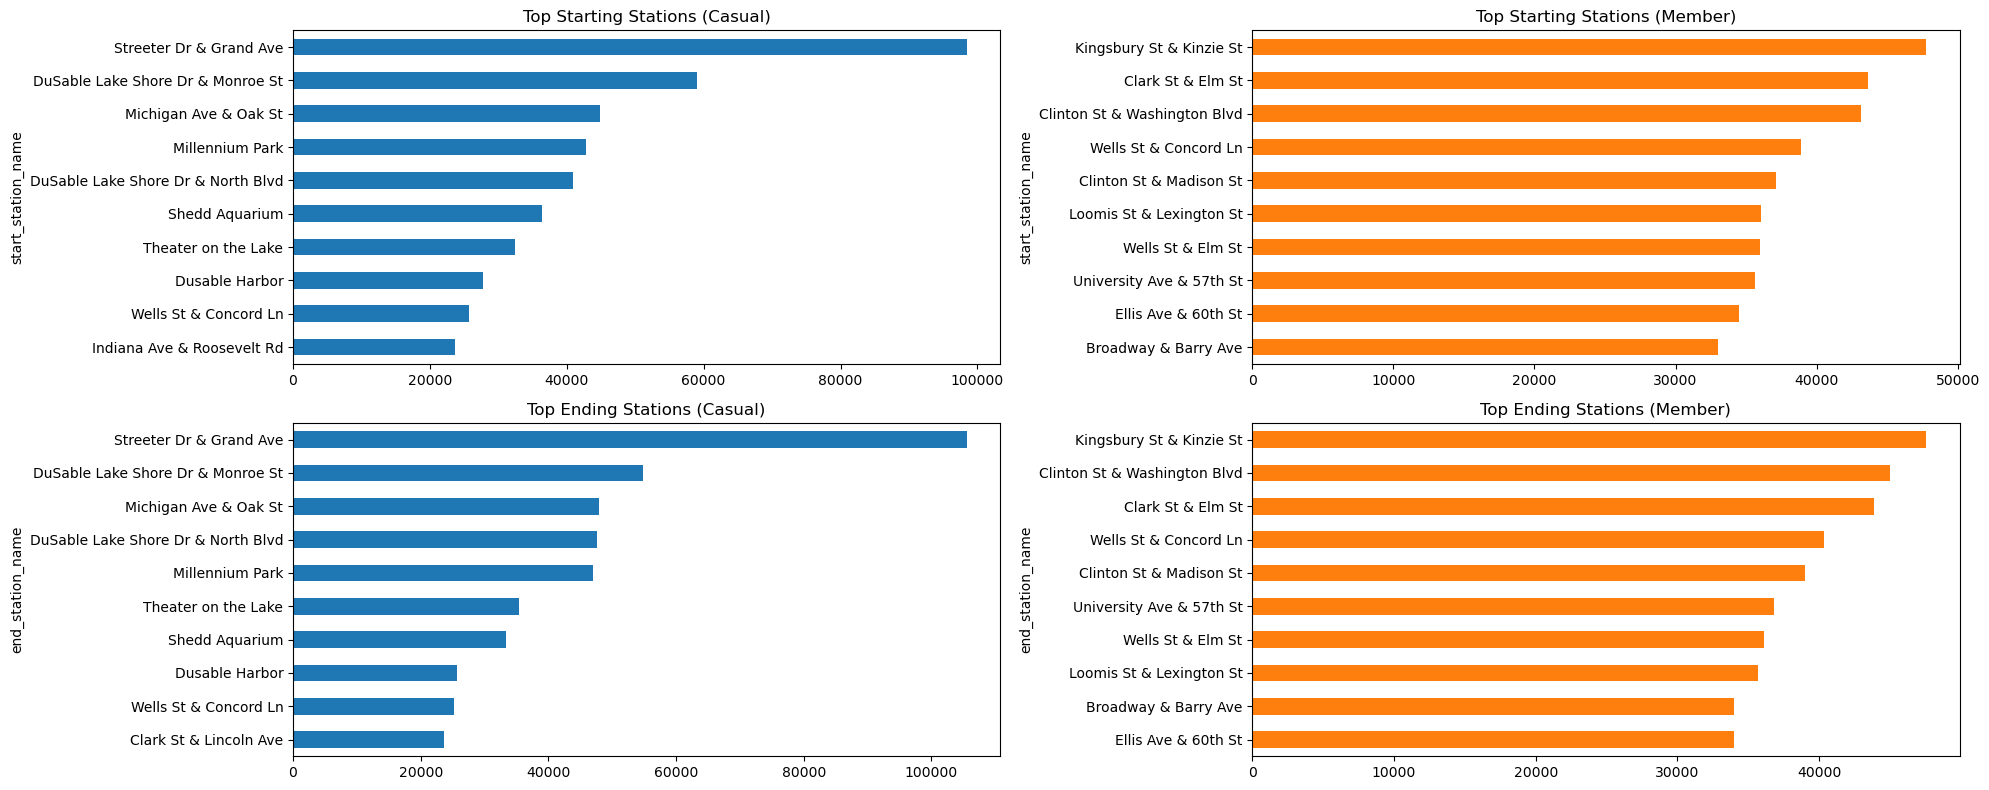

In [55]:
tmp_df = clean_df[['start_station_name','member_casual']]
counts_df = tmp_df.groupby(['start_station_name','member_casual']).size().unstack(fill_value=0)

plt.figure(figsize=(20,8))

plt.subplot(2, 2, 1)
subplot_df1 = counts_df['casual'].sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', stacked=True)
plt.title("Top Starting Stations (Casual)")

plt.subplot(2, 2, 2)
subplot_df2 = counts_df['member'].sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', stacked=True, color="tab:orange")
plt.title("Top Starting Stations (Member)")

tmp_df = clean_df[['end_station_name','member_casual']]
counts_df = tmp_df.groupby(['end_station_name','member_casual']).size().unstack(fill_value=0)

plt.subplot(2, 2, 3)
subplot_df2 = counts_df['casual'].sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', stacked=True)
plt.title("Top Ending Stations (Casual)")

plt.subplot(2, 2, 4) 
subplot_df2 = counts_df['member'].sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', stacked=True, color="tab:orange")
plt.title("Top Ending Stations (Member)")

# Show the plots
plt.tight_layout()
plt.show()

Observing the bar charts in comparison to the one above, it seems that casual riders have a clear preference towards the top 5 starting stations (Streeter Dr & Grand Ave, DuSable Lake Shore Dr & Monroe St, Michigan Ave & Oak St, Millenium Park, DuSable Lake Shore Dr & North Blvd). On the other hand, the starting stations of annual members tend to be more distributed throughout, with Kingsbury St & Kinzie St having less than 50,000 rides (despite annual members making up two-thirds of the dataset).

In the context of casual riders, the common starting and ending destinations of casual riders may be looked into as potential avenues for physical marketing campaigns to convert casual riders to members.

# Summary and Recommendation

The following summarizes the key findings from this data exploration:
1. Among the bike types, both members and casuals prefer **classic bikes**, followed by electric bikes and then docked bikes. 
2. On average, **casuals bike for longer** compared to members, possibly due to having a slower pace, or simply by having less consistent bike return times than members.
3. On a monthly basis, **bike rides increase during May to October**, the warmer seasons in the US, perhaps due to the warmer weather being more inviting for outdoor activities. Casual riders show a stronger seasonal pattern, indicating that they are less consistent in their bike rides compared to members throughout the months.
4. On a weekly basis, **casual riders tend to bike more on the weekends**, while annual members bike more throughout the weekdays, which may suggest that annual members bike to their workplaces or schools more. 
5. On an hourly basis, annual members tend to start rides around 08AM and 05PM, supporting the previous hypothesis. On the other hand, **casual members start rides at a more distributed pace, peaking at 05PM**. It may be inferred that casual riders have not incorporated using Cyclistic bikes as part of their travel to workplaces. 
6. The top 3 starting and ending stations for casual members are concentrated at **Streeter Dr & Grand Ave, DuSable Lake Shore Dr & Monroe St, Michigan Ave & Oak St**. The starting and ending stations of annual members tend to be more distributed towards the stations. Marketing efforts may also be updated to increase the bike rides in other stations for casual riders.

The following **recommendations** may be made for the marketing team to improve the conversion figures of casual riders:

1. Since rides peak during the summer, hosting events during the summer season may improve the membership conversion figures of casual riders.
2. To entice casual riders to ride during the weekdays, flexible pricing options may be given for rides during the weekdays.
3. Physical modes of marketing may be placed at the common starting and ending stations. The promos may be made to increase rides to other stations.
4. Improve on and promote the features of docked bikes, such as enhanced security, for higher usage.
5. Biking to work or school promos may be created to increase rides during the morning.
6. Social media may be leveraged to increase the reach of these campaigns.

Based on these statements, it is clear that casual riders represent a good opportunity for Cyclistic, as helping them incorporate the bike rides into their daily lives more will increase the topline numbers for the company. As for extra data that may prove useful to the dataset, basic demographics such as the age, gender, height and weight of the users of the bikes may help in improving the features in Cyclistic's services to be tailored to the clients' needs. This also contributes to the mission of Cyclistic in building a culture of inclusivity for everyone in the biking community. 